In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv("/content/magic04.data", header=None, names=['length', 'width', 'size', 'conc', 'conc1', 'asym', 'm3long', 'm3trans', 'alpha', 'dist', 'class'])
df.head()

,length,width,size,conc,conc1,asym,m3long,m3trans,alpha,dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


# EDA

In [5]:
df['class'].value_counts()

g    12332
h     6688
Name: class, dtype: int64

In [6]:
df.isna().sum()

length     0
width      0
size       0
conc       0
conc1      0
asym       0
m3long     0
m3trans    0
alpha      0
dist       0
class      0
dtype: int64

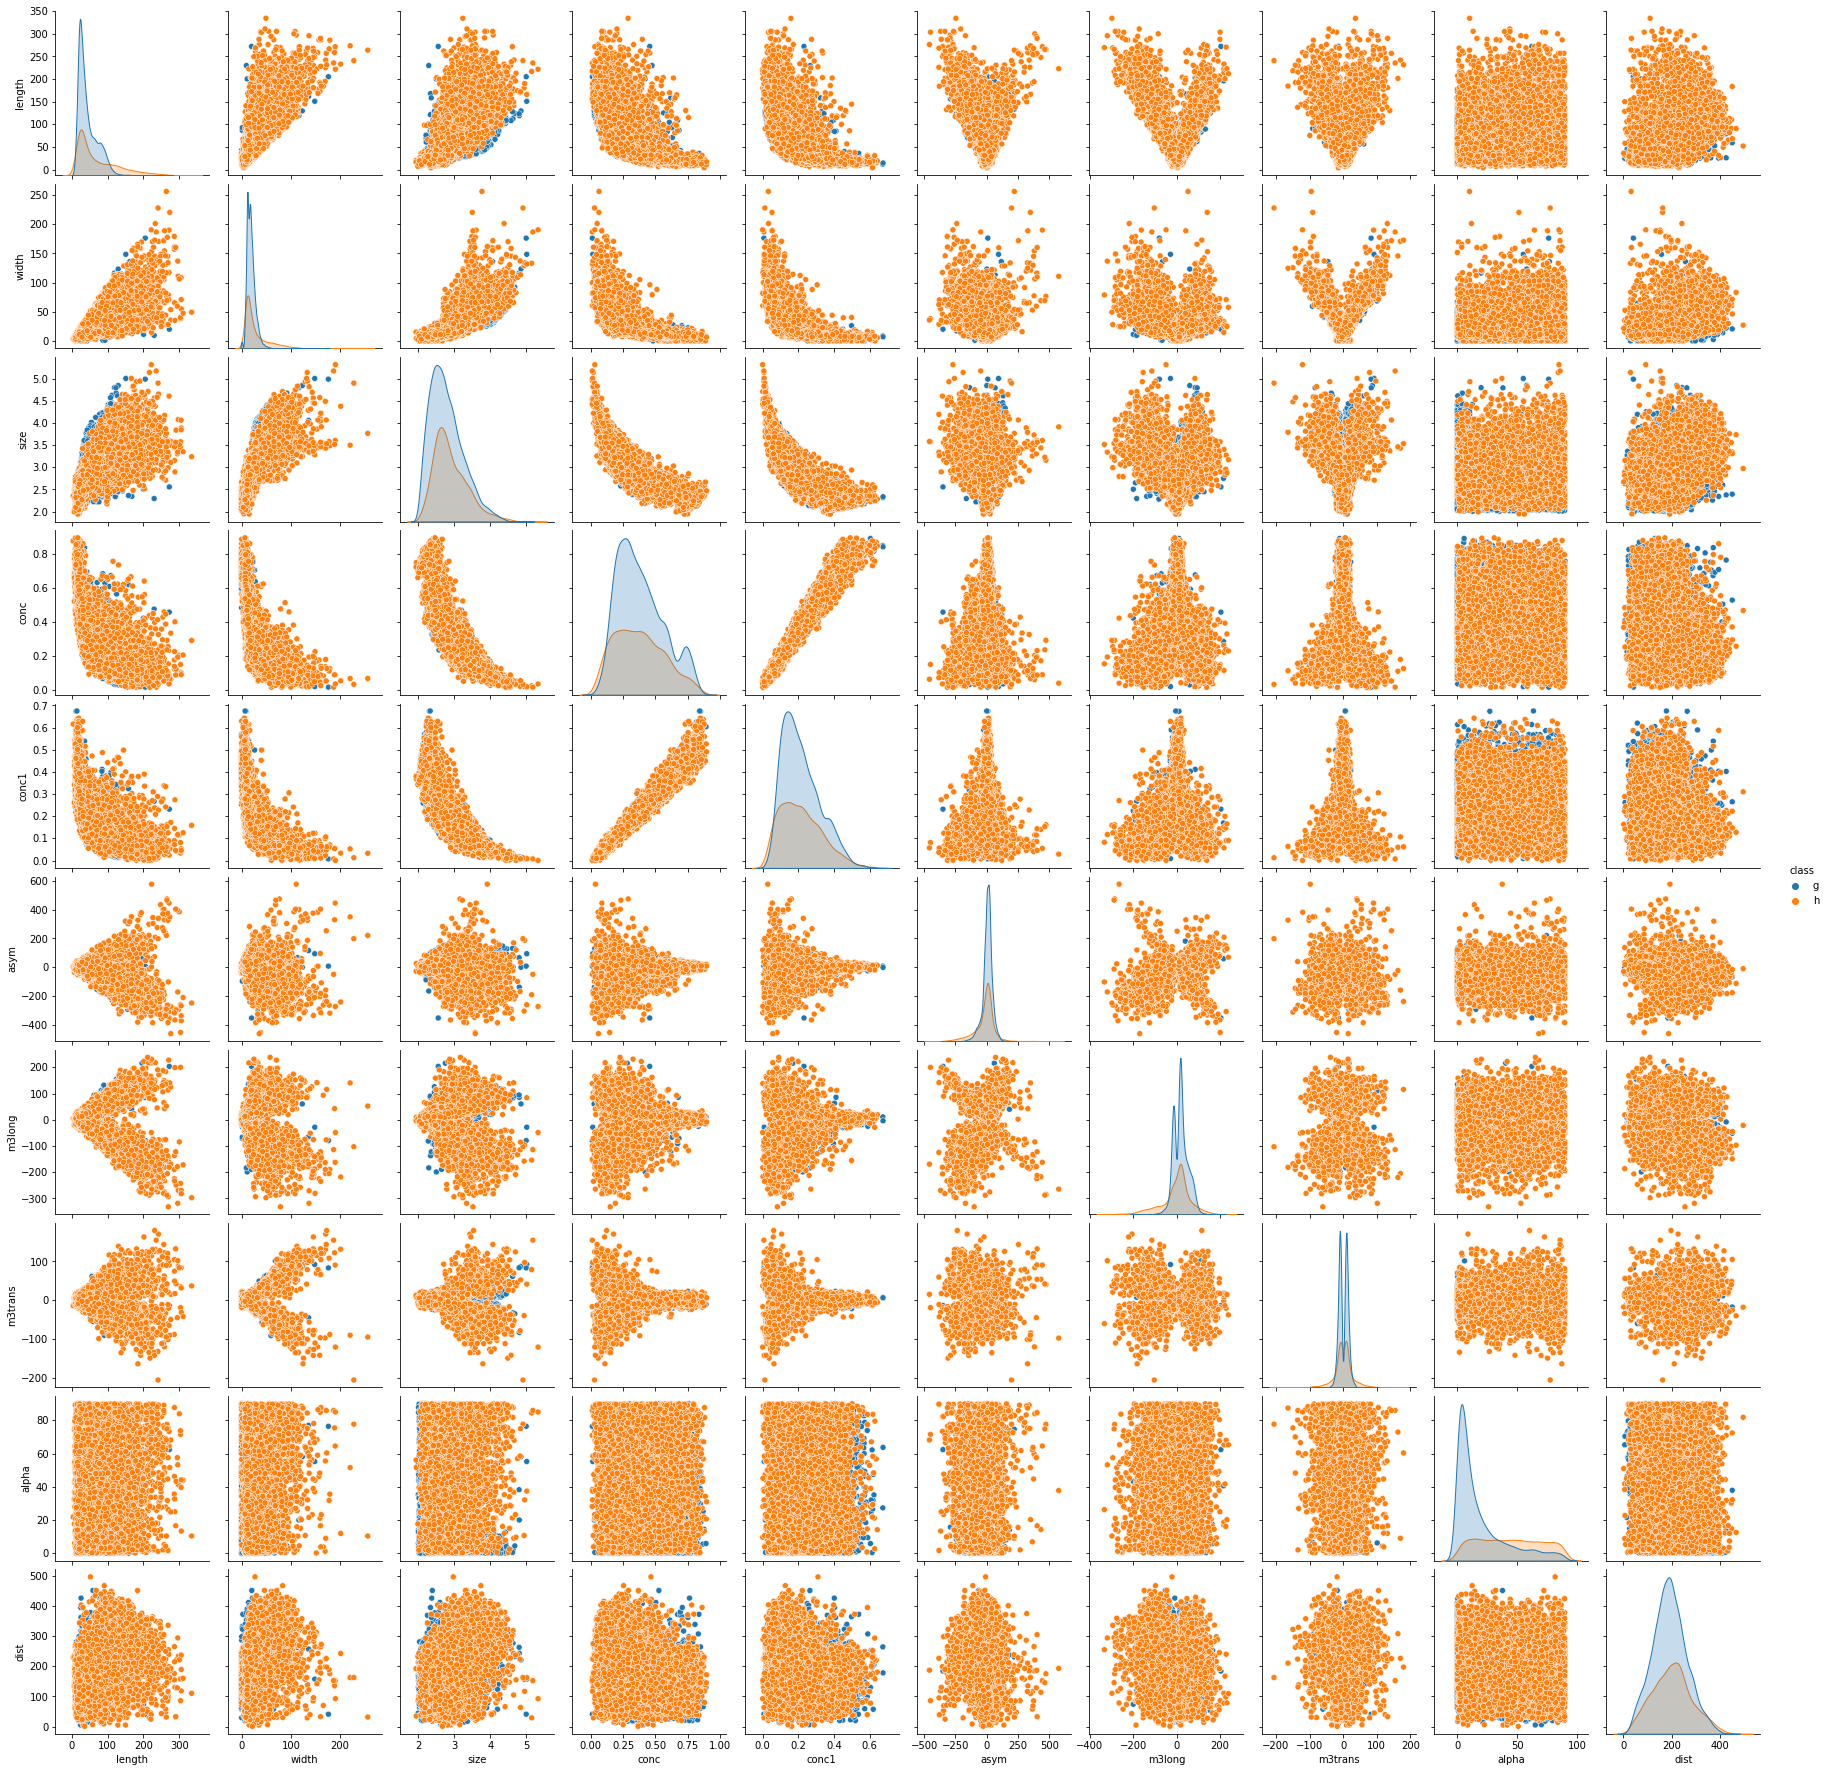

In [10]:
sns.pairplot(df, hue="class")

<Axes: >

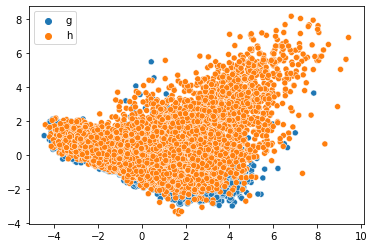

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

scaler = StandardScaler()
X = scaler.fit_transform(df.drop(['class'],axis=1))


pca = PCA()
result = pca.fit_transform(X)
class_array = np.array(df['class'])
class_array_reshaped = class_array.reshape(-1, 1)
result_with_class = np.concatenate([result, class_array_reshaped], axis=1)

sns.scatterplot(data=result_with_class, x=result_with_class[:,0], y=result_with_class[:,1], hue=result_with_class[:,-1])


<Axes: >

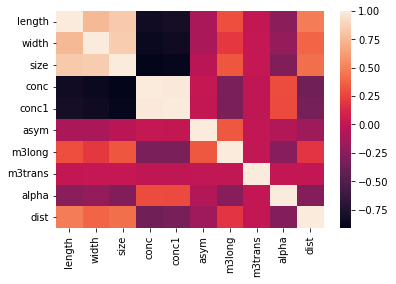

In [26]:
sns.heatmap(df.corr("spearman"))

# Classification

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, list([0 if el=='g' else 1 for el in df['class']]), test_size=0.2)

In [33]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"f1: {f1_score(y_test, y_pred)}")

accuracy: 0.7281808622502629
f1: 0.4980582524271844


In [34]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"f1: {f1_score(y_test, y_pred)}")

accuracy: 0.7852260778128286
f1: 0.6498071153021859


In [35]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"f1: {f1_score(y_test, y_pred)}")

accuracy: 0.7833859095688749
f1: 0.6178107606679036


И од самите визуелизации може да се види дека нема јасна врска помеѓу еден од атрибутите и класата, па и затоа не се добиваат најдобри резултати. Бидејќи соодносот на класите е 2:1 најосновен модел би бил точен 66% во случаевите и наивен баесов не е многу подалеку од тоа. Другите модели успеваат да постигнат повисоки резултати за метриките.

Причината зошто LDA и QDA даваат подобри резултати можеби е тоа што наивен баесов претпоставува дека атрибутите се независни, а од корелираноста може да се види дека тоа не е баш така.